In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
course_information = pd.read_csv('course_information.csv')
course_posts = pd.read_csv('course_posts.csv')
course_threads = pd.read_csv('course_threads.csv')

In [296]:
course_information[:5]

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,392
2,Automata,automata-002,6,9,11/4/2013,NaN,Q,E,429,NaN,493
3,Big Data in Education,bigdata-edu-001,8,7,10/24/2013,NaN,?,E,585,NaN,710
4,Bioinformatics Algorithms (Part 1),bioinformatics-001,12,9,11/4/2013,1/27/2014,Q,E,1160,NaN,941


In [297]:
course_posts[:5]

,post_id,thread_id,course_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,3,2,analysenumerique-001,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,4,2,analysenumerique-001,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,7,2,analysenumerique-001,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,8,2,analysenumerique-001,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,15,2,analysenumerique-001,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [298]:
course_threads[:5]

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id
0,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
1,3,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,572,0,13
2,4,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,196,0,13
3,7,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,135,0,13
4,8,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,188,0,13


In [299]:
course_information_new = course_information.sort_values('num_threads',ascending=False)

Text(0.5, 0, 'Course')

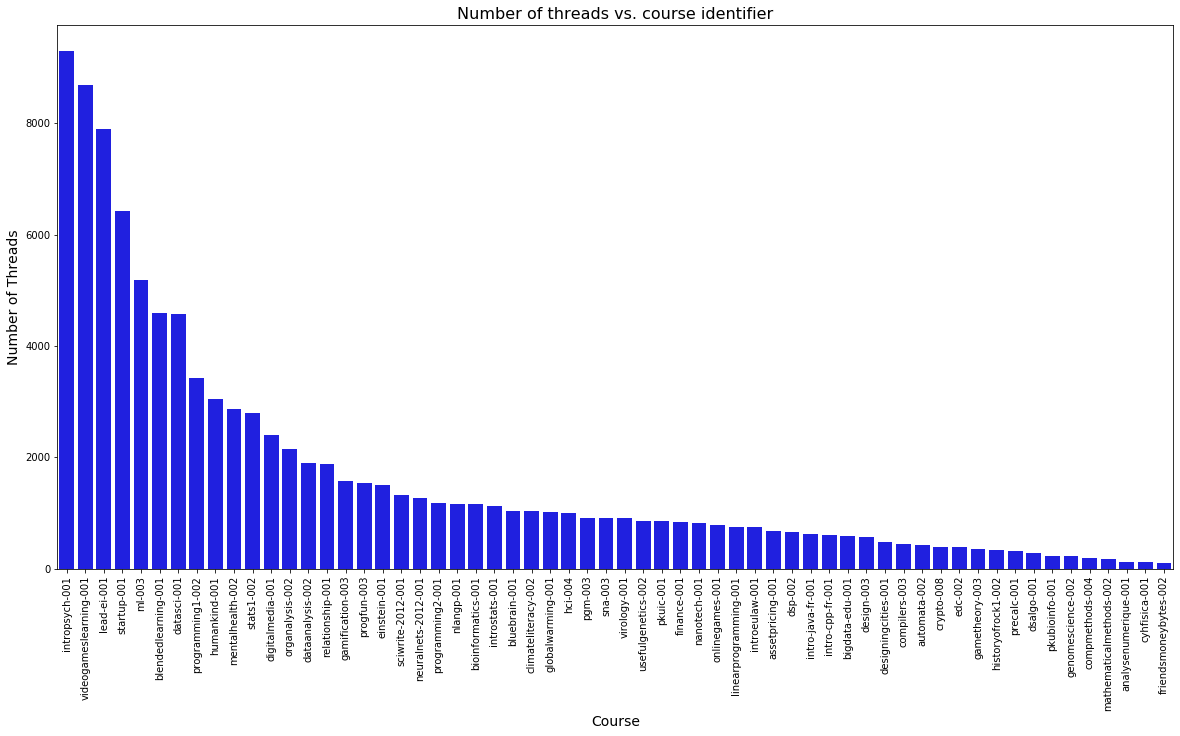

In [300]:

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x= 'course_id',y = 'num_threads', data = course_information_new, color = 'b',ax=ax)
plt.title("Number of threads vs. course identifier", size=16)
plt.xticks(rotation=90, horizontalalignment="center")
plt.ylabel("Number of Threads", size=14)
plt.xlabel("Course", size=14)

In [301]:
result = pd.merge(course_information, course_posts, how='outer', on=['course_id'])
result[:5]

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,...,thread_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [302]:
result_new = result.groupby('name')['post_id'].count().to_frame().reset_index()
result_new = result_new.sort_values('post_id',ascending=False)
result_new[:5]

,name,post_id
30,Inspiring Leadership through Emotional Intelli...,81373
48,Startup Engineering,45947
33,Introduction to Psychology,45776
0,A Brief History of Humankind,43968
37,Machine Learning,39654


Text(0.5, 0, 'Thread Size(Number of Messages)')

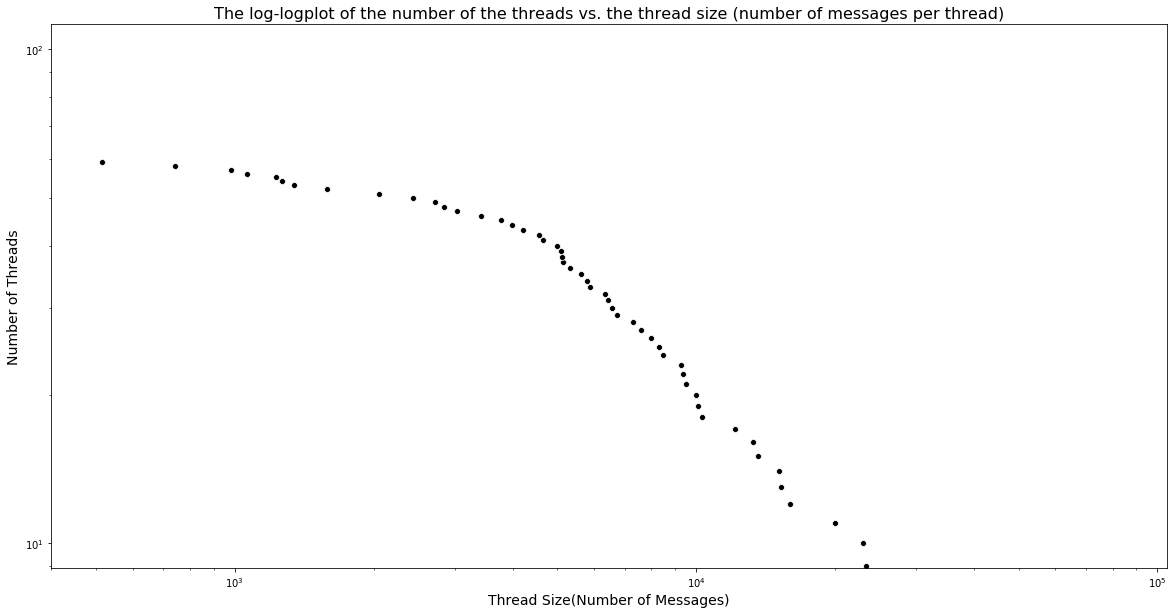

In [303]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="post_id", y="name",data=result_new,color = 'black',ax=ax)
plt.yscale('log')
plt.xscale('log')
plt.title("The log-logplot of the number of the threads vs. the thread size (number of messages per thread)", size=16)
plt.ylabel("Number of Threads", size=14)
plt.xlabel("Thread Size(Number of Messages)", size=14)

ValueError: Could not interpret input 'user_id'

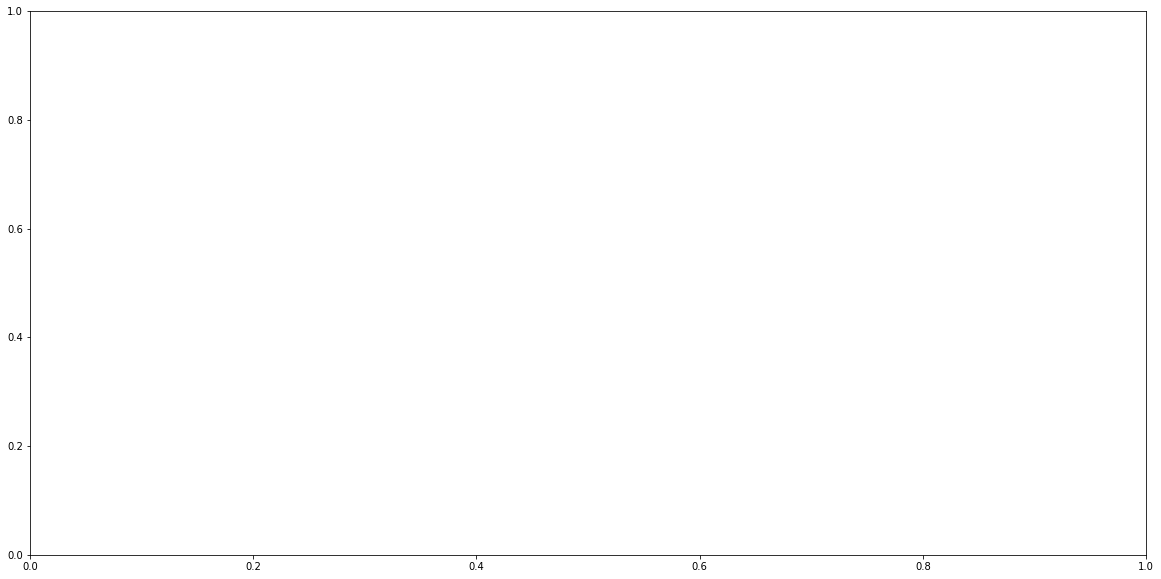

In [304]:

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="user_id", y="num_users",data=result_new,color = 'b',ax=ax)
plt.yscale('log')
plt.xscale('log')
plt.title("log-log plot of the message count vs. the number of users", size=16)
plt.ylabel("Number of Threads", size=14)
plt.xlabel("Thread Size(Number of Messages)", size=14)

In [305]:
course_posts_new = course_posts.groupby('user_type')['post_id'].count().to_frame().reset_index()
course_posts_new = course_posts_new.sort_values('post_id',ascending=False)

Text(0.5, 0, 'Number of Threads')

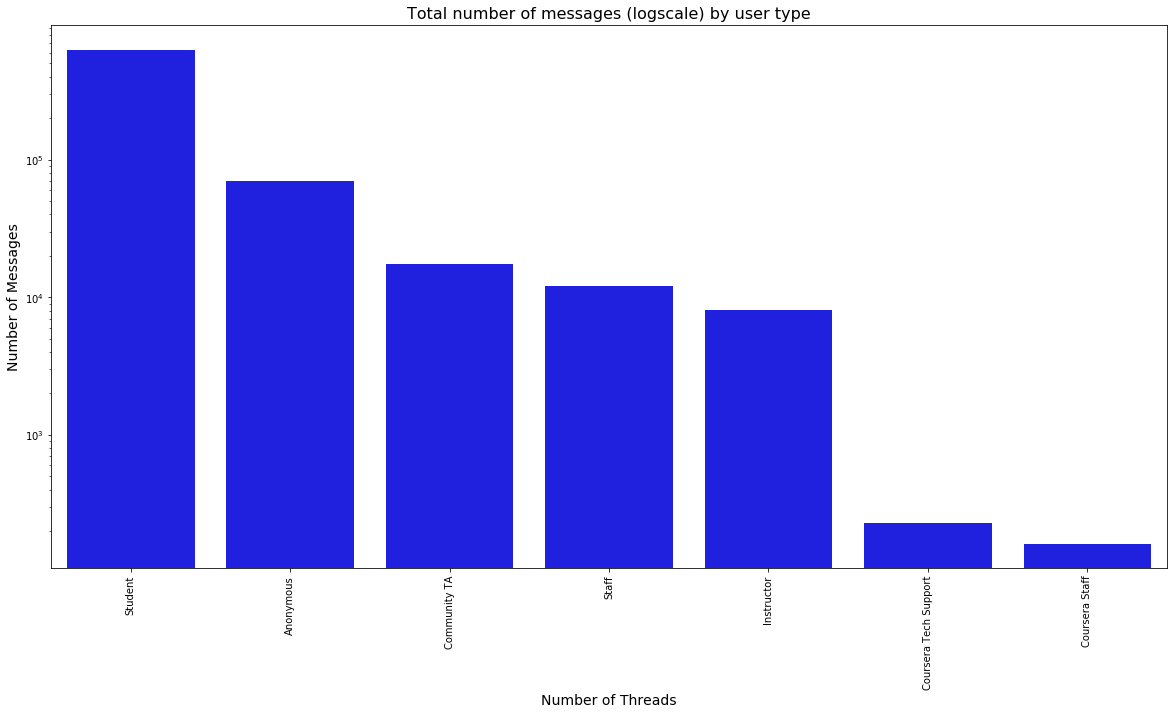

In [306]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x= 'user_type',y = 'post_id', data = course_posts_new, color = 'b',ax=ax)
plt.yscale('log')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Total number of messages (logscale) by user type", size=16)
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Number of Threads", size=14)

In [308]:
#result = pd.merge(course_information, course_information, how='outer', on=['course_id'])
result = pd.merge(pd.merge(course_information,course_posts,on='course_id', how='outer'),course_threads,on='course_id', how='outer')
#result = course_information.merge(course_information,on='course_id').merge(course_posts,on='course_id')
result[:5]

MemoryError: 

In [294]:
sorted_result = result.loc[(result['type'] == 'A') | (result['type'] == 'S')]
sorted_result[:5]

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users


ValueError: Could not interpret input 'post_id'

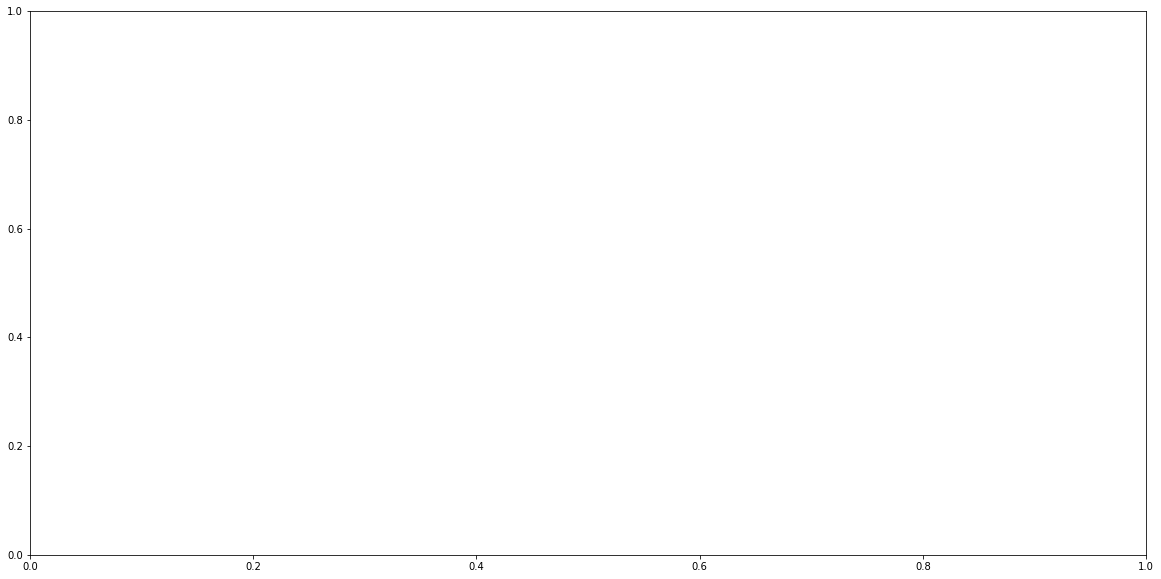

In [277]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.scatterplot(x= 'post_id',y = 'thread_id',hue="type", data = sorted_result, color = 'b',ax=ax)
plt.xticks(rotation=90, horizontalalignment="center") 
plt.title("Total number of messages (logscale) by user type", size=16) 
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Number of Threads", size=14)